In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [6]:
video_data = pd.read_excel('Video_Stats.xlsx')
channel_data = pd.read_excel('Channel_Stats.xlsx')


In [7]:
video_data.head(10)

,Title,Published_date,Views,Likes,Comments,Duration,Channel,Month,Year
0,I'm leaving to the Amazon jungle...,2024-04-25 12:00:20,579741,33834,4652,00:01:15,Lex Fridman,4,2024
1,"Sean Carroll: General Relativity, Quantum Mech...",2024-04-22 19:19:46,1388867,15761,1919,02:35:24,Lex Fridman,4,2024
2,"Neil Adams: Judo, Olympics, Winning, Losing, a...",2024-04-20 21:52:50,79144,1390,129,02:27:51,Lex Fridman,4,2024
3,"Lex Fridman does judo with Travis Stevens, Oly...",2024-04-18 21:13:39,210832,5309,368,00:05:33,Lex Fridman,4,2024
4,"Edward Gibson: Human Language, Psycholinguisti...",2024-04-17 17:04:23,270047,4031,653,02:50:45,Lex Fridman,4,2024
5,"Andrew Callaghan: Channel 5, Gonzo, QAnon, O-B...",2024-04-13 16:31:40,1904344,33557,4597,02:52:00,Lex Fridman,4,2024
6,"Bassem Youssef: Israel-Palestine, Gaza, Hamas,...",2024-04-05 20:35:53,1895651,40181,8614,02:43:14,Lex Fridman,4,2024
7,"Tulsi Gabbard: War, Politics, and the Military...",2024-04-02 16:10:25,982370,23032,5566,01:50:42,Lex Fridman,4,2024
8,"Mark Cuban: Shark Tank, DEI & Wokeism Debate, ...",2024-03-29 19:59:24,1008220,16373,3421,02:13:15,Lex Fridman,3,2024
9,"Dana White: UFC, Fighting, Khabib, Conor, Tyso...",2024-03-25 14:34:11,2133452,38411,3840,01:30:21,Lex Fridman,3,2024


In [8]:
video_data.sort_values(by='Duration' , ascending=False ) 

,Title,Published_date,Views,Likes,Comments,Duration,Channel,Month,Year
105,"Balaji Srinivasan: How to Fix Government, Twit...",2022-10-20 16:25:24,903667,17703,2915,07:47:52,Lex Fridman,10,2022
21,Matthew Cox: FBI Most Wanted Con Man - $55 Mil...,2024-01-17 16:35:17,1032478,18681,3408,06:00:54,Lex Fridman,1,2024
78,"Tim Dodd: SpaceX, Starship, Rocket Engines, an...",2023-02-02 17:33:01,711479,17149,2013,05:15:45,Lex Fridman,2,2023
128,"John Carmack: Doom, Quake, VR, AGI, Programmin...",2022-08-04 17:02:16,1568428,39914,3869,05:14:51,Lex Fridman,8,2022
260,Charles Hoskinson: Cardano | Lex Fridman Podca...,2021-06-16 15:39:38,771851,28409,3780,04:57:51,Lex Fridman,6,2021
...,...,...,...,...,...,...,...,...,...
5807,"Active businesses are like horcruxes, every ti...",2022-06-03 15:34:28,14597,400,29,00:00:07,Alex Hormozi,6,2022
5809,Your spouse marries 2 people,2023-02-21 21:00:03,19279,1447,10,00:00:06,Alex Hormozi,2,2023
5808,The Work That Matters Most...,2024-04-12 14:00:45,14840,1373,16,00:00:06,Alex Hormozi,4,2024
5810,Effort Always Goes Unnoticed,2024-03-24 23:00:07,25320,2764,30,00:00:04,Alex Hormozi,3,2024


### Scatter plot to visualize the relationship between video duration and views

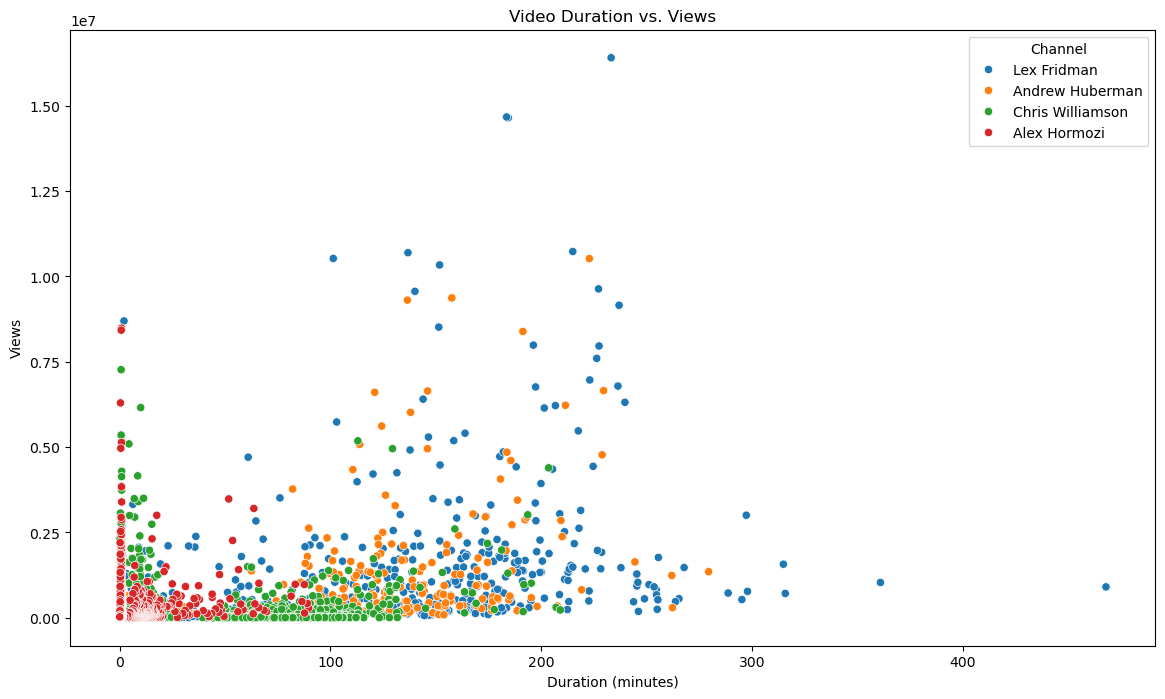

In [9]:
video_data['Duration'] = pd.to_timedelta(video_data['Duration'])
plt.figure(figsize=(14, 8))
sns.scatterplot(x=video_data['Duration'].dt.total_seconds() / 60, y=video_data['Views'], hue=video_data['Channel'])
plt.title('Video Duration vs. Views')
plt.xlabel('Duration (minutes)')
plt.ylabel('Views')
plt.legend(title='Channel')
plt.show()

### Bar chart to compare total views and subscribers across channels

In [10]:
fig = px.bar(channel_data, x='channel_name', y=['views', 'subscribers'], title='Total Views and Subscribers by Channel',
             labels={'value': 'Count', 'variable': 'Metric'}, barmode='group', text_auto=True)

fig.update_layout(xaxis_title='Channel Name', yaxis_title='Count')
fig.show()

### Boxplots with views Distribution by Channel

In [11]:
fig_box = px.box(video_data, 
                 x='Channel', 
                 y='Views', 
                 title='Views Distribution by Channel',
                 labels={'Channel': 'Channel Name', 'Views': 'Views'})

fig_box.update_layout(xaxis_title='Channel Name', yaxis_title='Views')
fig_box.show()

### Heatmap to show the correlation between views, likes and comments

In [12]:
numeric_columns = ['Views', 'Likes','Comments']  
correlation_matrix = video_data[numeric_columns].corr()

fig_heatmap = px.imshow(correlation_matrix, 
                        text_auto=True, 
                        title='Correlation Matrix of Video Metrics',
                        labels=dict(color='Correlation'))

fig_heatmap.update_layout(xaxis_title='Metrics', yaxis_title='Metrics')
fig_heatmap.show()

The highest correlation is observed berween views and likes, while the lowest is between comments and likes

### Scatter Plot with Regression Line: Views vs Likes

In [13]:
fig = px.scatter(video_data, x='Views', y='Likes', trendline='ols', 
                 title='Scatter Plot with Regression Line: Views vs Likes',
                 labels={'Views': 'Views', 'Likes': 'Likes'},
                 trendline_color_override="blue")

fig.update_traces(marker=dict(color='rgba(255, 127, 14, 0.7)'))

fig.show()

While there seems to be some correlation between views and likes , it is definetely not enough to draw meaningful conclusions 

Line charts for: Average Comments per view,
                 Average Likes per view and
                 Number of videos published
over the years

In [14]:
video_data['Likes_per_view'] = video_data['Likes'] / video_data['Views']
video_data['Comments_per_view'] = video_data['Comments'] / video_data['Views']

videos_published_yearly = video_data.groupby(['Channel', 'Year']).size().reset_index(name='Videos_published')

avg_comments_per_view_yearly = video_data.groupby(['Channel', 'Year'])['Comments_per_view'].mean().reset_index()

avg_likes_per_view_yearly = video_data.groupby(['Channel', 'Year'])['Likes_per_view'].mean().reset_index()

fig1 = px.line(avg_comments_per_view_yearly, x='Year', y='Comments_per_view', color='Channel',
               title='Average Comments per View Over Years',
               labels={'Year': 'Year', 'Comments_per_view': 'Average Comments per View'},
               template='plotly_white')  

fig1.update_traces(line=dict(width=2), mode='lines+markers', marker=dict(size=8))

fig1.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), legend_title_text='Channel')

fig2 = px.line(avg_likes_per_view_yearly, x='Year', y='Likes_per_view', color='Channel',
               title='Average Likes per View Over Years',
               labels={'Year': 'Year', 'Likes_per_view': 'Average Likes per View'},
               template='plotly_white')  

fig2.update_traces(line=dict(width=2), mode='lines+markers', marker=dict(size=8))

fig2.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), legend_title_text='Channel')

fig1.show()
fig2.show()

fig3 = px.line(videos_published_yearly, x='Year', y='Videos_published', color='Channel',
               title='Number of Videos Published Over Years',
               labels={'Year': 'Year', 'Videos_published': 'Number of Videos Published'},
               template='plotly_white')  

fig3.update_traces(line=dict(width=2), mode='lines+markers', marker=dict(size=8))

fig3.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01), legend_title_text='Channel')
fig3.show()